# Task5_TSF: To explore business analytics

Question and dataset:
    
Perform ‘Exploratory Data Analysis’ on the provided dataset
‘SampleSuperstore’
You are the business owner of the retail firm and want to see
how your company is performing. You are interested in finding
out the weak areas where you can work to make more profit.
What all business problems you can derive by looking into the
data? You can choose any of the tool of your choice
(Python/R/Tableau/PowerBI/Excel)
Dataset:
https://drive.google.com/file/d/1lV7is1B566UQPYzzY8R2ZmOritTW299S/view

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv(r'C:\Users\Mirza\Desktop\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
print(df.drop_duplicates(keep='first',inplace=True))

None


             Postal Code     Sales  Quantity  Discount    Profit
Postal Code     1.000000 -0.023476  0.013110  0.059225 -0.029892
Sales          -0.023476  1.000000  0.200722 -0.028311  0.479067
Quantity        0.013110  0.200722  1.000000  0.008678  0.066211
Discount        0.059225 -0.028311  0.008678  1.000000 -0.219662
Profit         -0.029892  0.479067  0.066211 -0.219662  1.000000
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]), <a list of 30 Text xticklabel objects>)


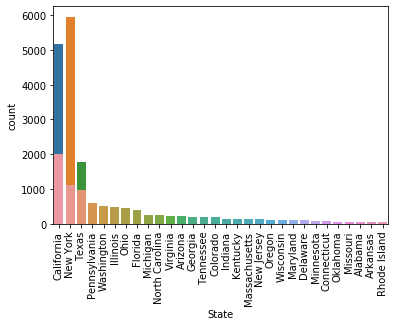

In [6]:
corr=df.corr()
print(corr)
print(sb.countplot(df['Ship Mode']))
print(sb.countplot(df['Segment']))
print(sb.countplot(df['State'],order=(df['State'].value_counts().head(30)).index))
print(plt.xticks(rotation=90))


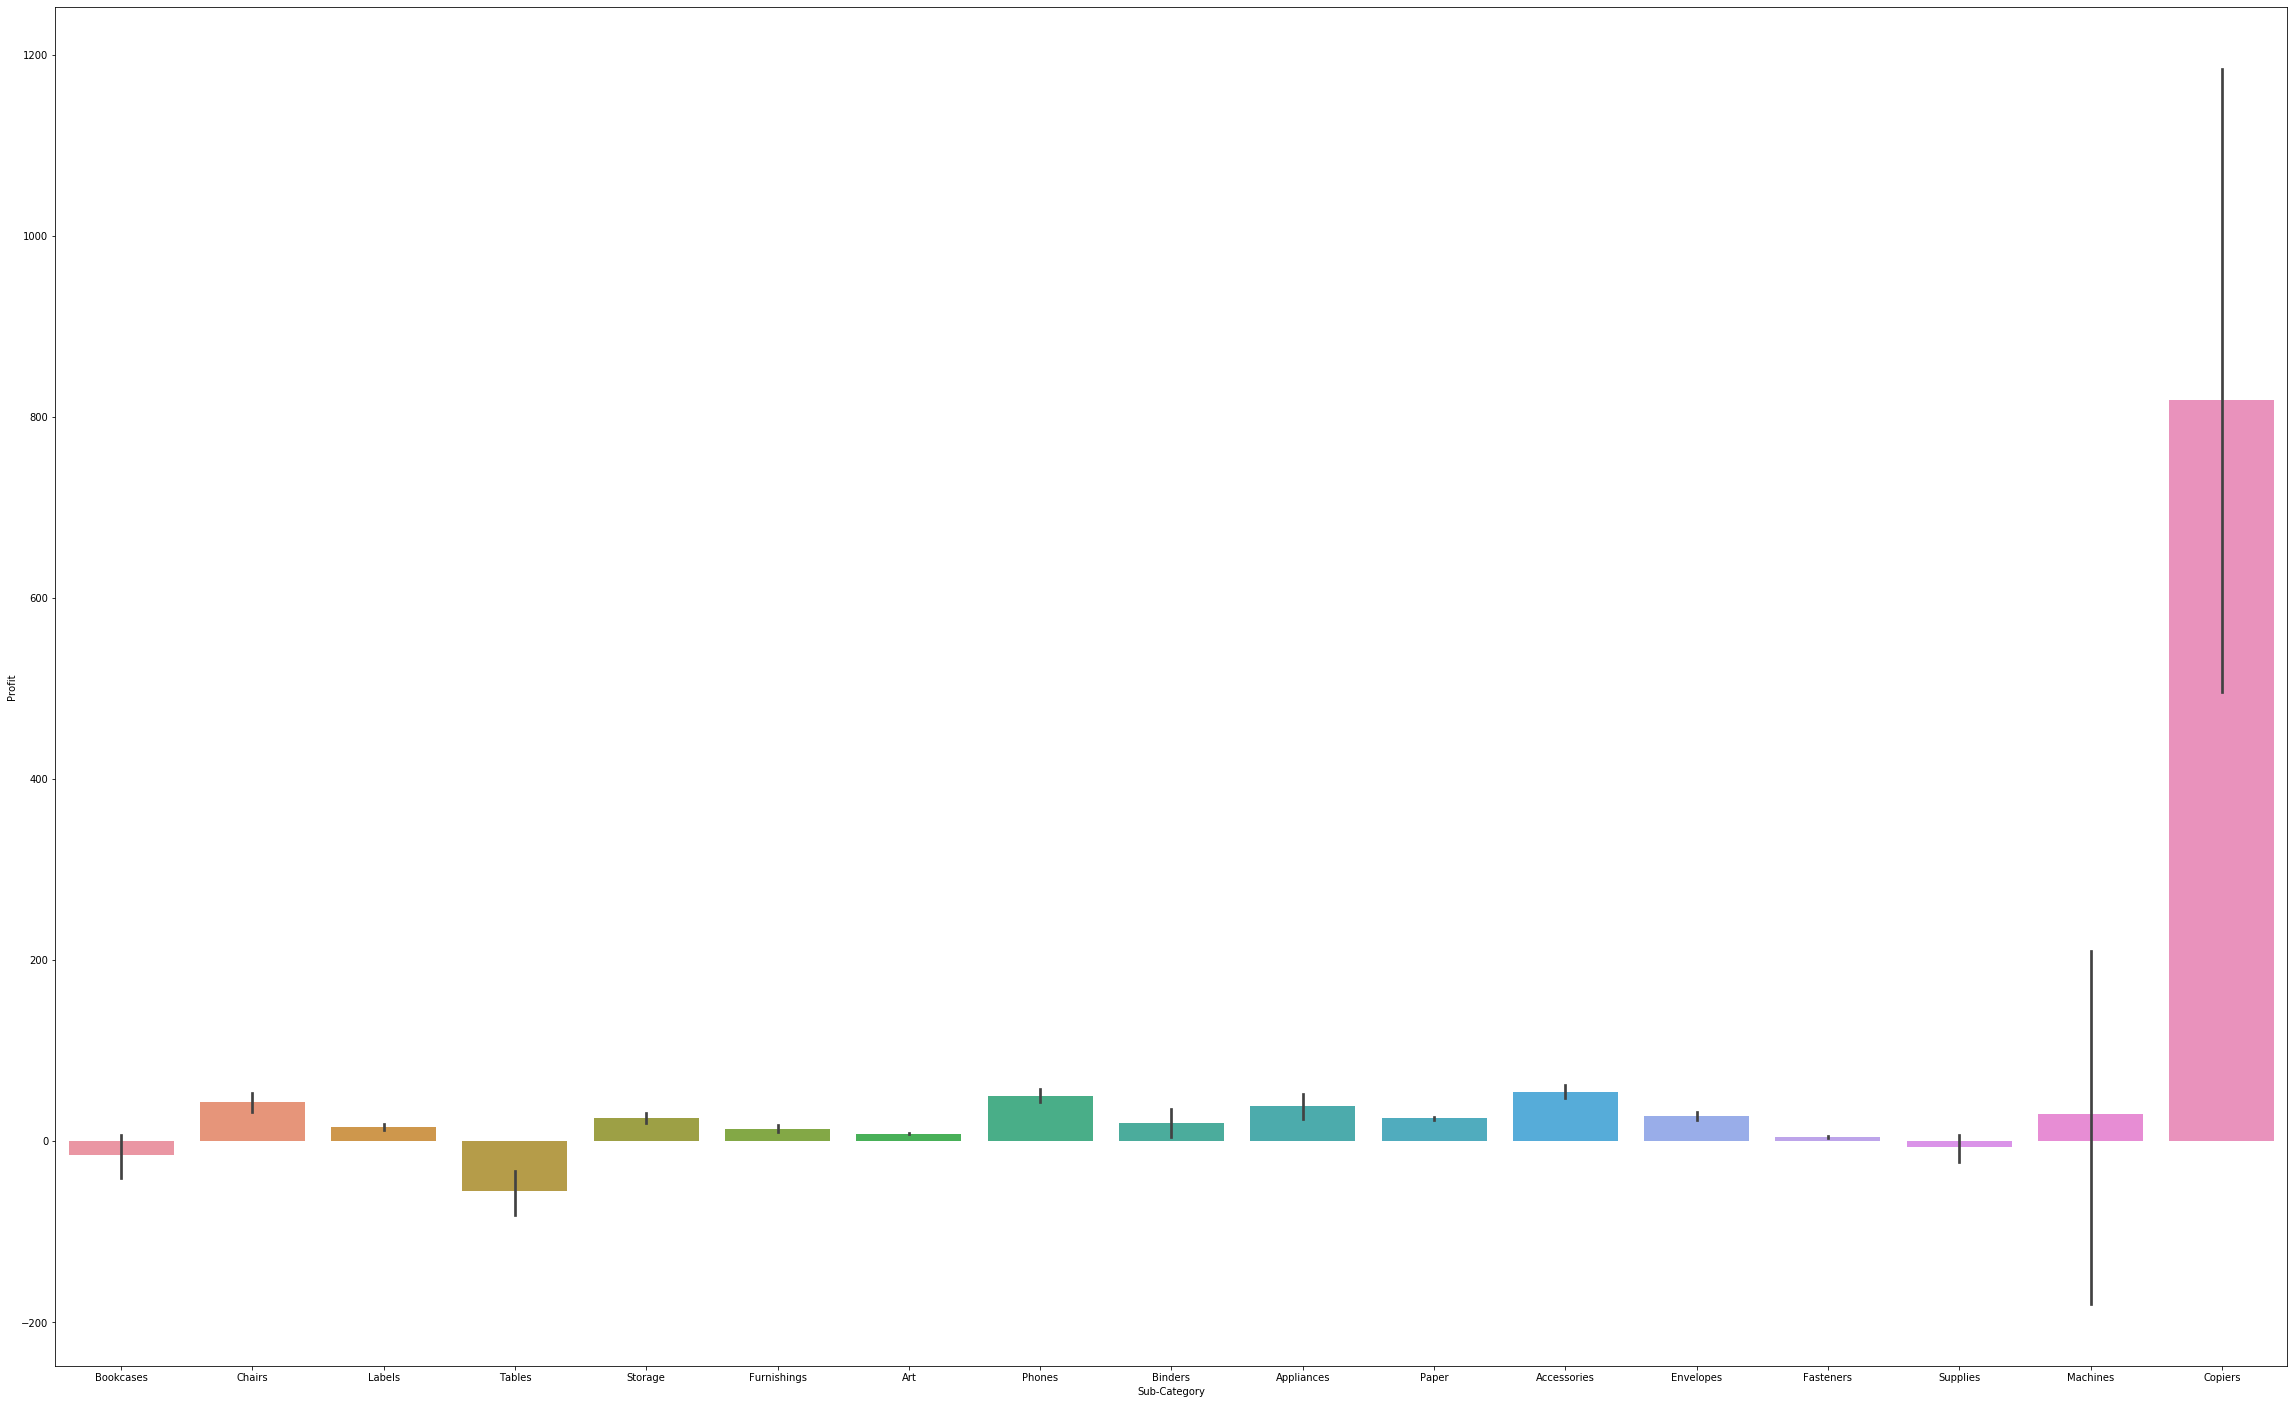

In [7]:
plt.figure(figsize=(40,25))
sb.barplot(df['Sub-Category'],df['Profit'])

In [8]:
state=df.groupby("State")[['Sales','Profit']].sum().sort_values(by="Sales",ascending=False)
plt.figure(figsize=(50,50))

<Figure size 3600x3600 with 0 Axes>

<Figure size 3600x3600 with 0 Axes>

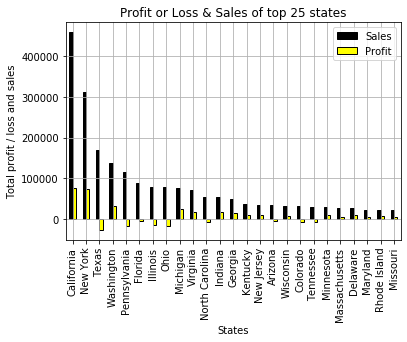

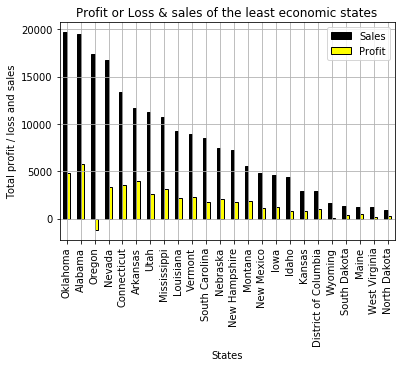

In [9]:
state[:25].plot(kind="bar",color=['k','yellow'],edgecolor="#000000")
plt.title("Profit or Loss & Sales of top 25 states")
plt.xlabel("States")
plt.ylabel("Total profit / loss and sales")
plt.grid(True)
state[25:].plot(kind="bar",color=["k","yellow"],edgecolor="#000000")
plt.title("Profit or Loss & sales of the least economic states")
plt.xlabel("States")
plt.ylabel("Total profit / loss and sales")
plt.grid(True)

C:\Users\Mirza\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


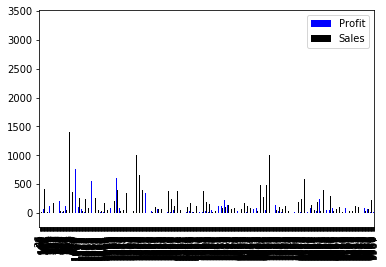

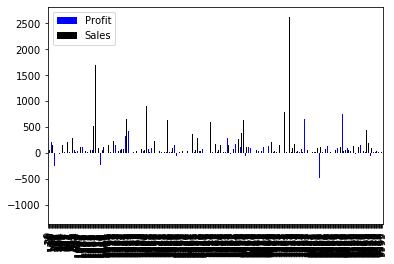

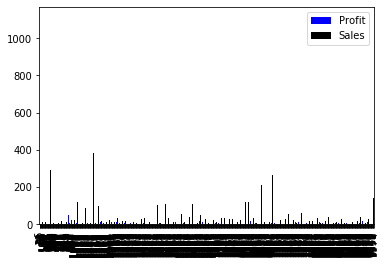

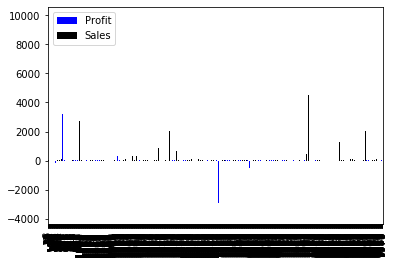

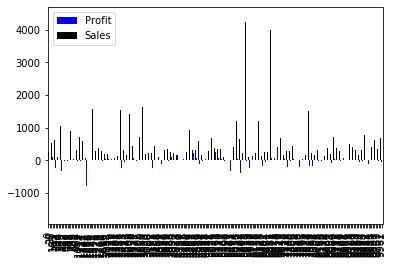

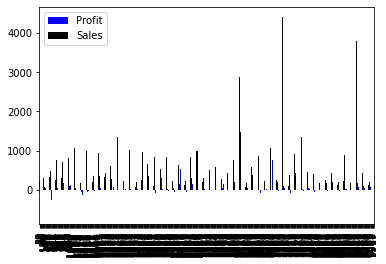

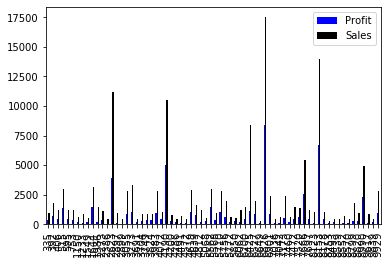

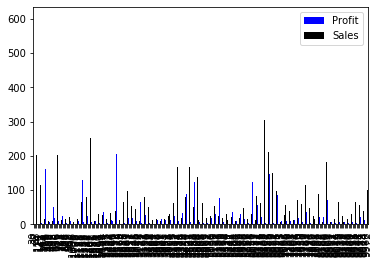

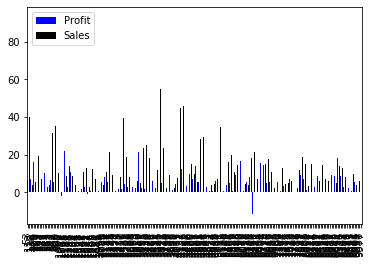

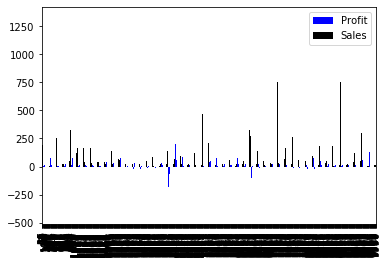

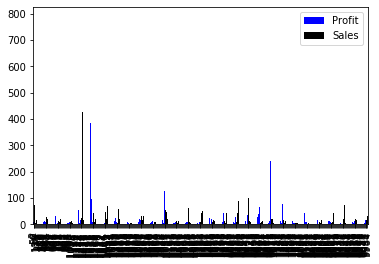

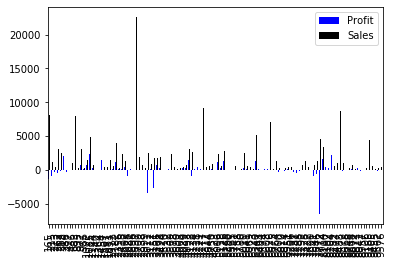

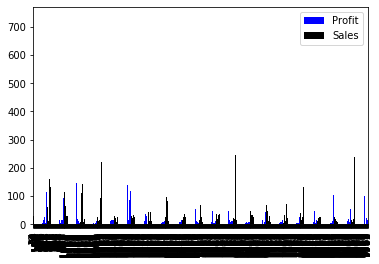

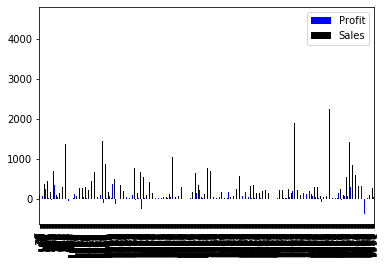

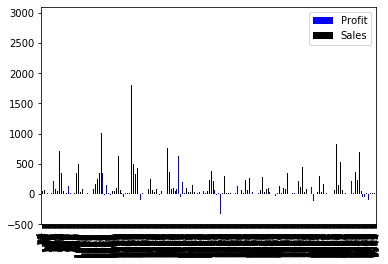

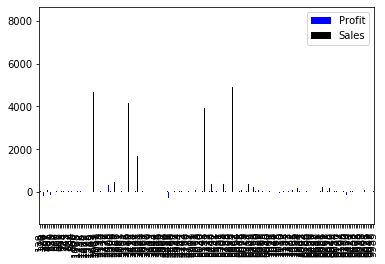

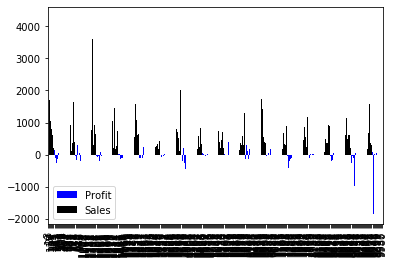

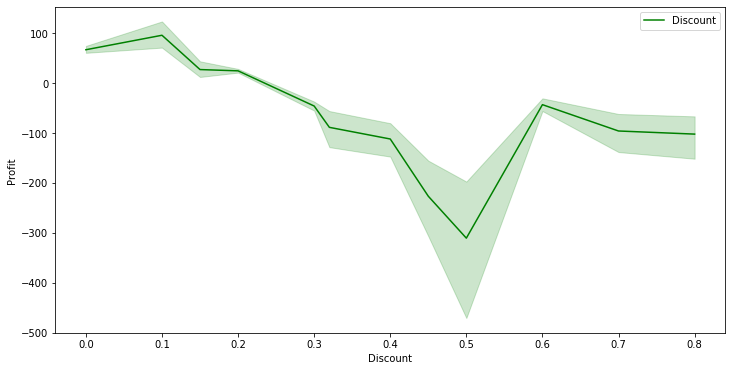

In [10]:
df.groupby('Sub-Category')['Profit','Sales'].plot.bar(color=['b','k'])
pd.DataFrame(df.groupby('State').sum())['Discount'].sort_values(ascending=True)
pd.DataFrame(df.groupby('State').sum())['Profit'].sort_values(ascending=True)

plt.figure(figsize=(12,6))

sb.lineplot('Discount','Profit',data=df,color='g',label='Discount')
plt.legend()